In [64]:
pip install surprise

In [65]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import json
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)
df = pd.read_json('/content/drive/MyDrive/project5125/Luxury_Beauty_5.json', orient='record',lines=True)
#df.to_csv('/content/drive/MyDrive/project5125/orignalData.csv')
df=df[df.overall!=5]
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
8,4,False,"01 24, 2017",A1YY53NQXFKMRN,B00004U9V2,{'Size:': ' 3.5 oz.'},Trixie,Nice lightweight hand cream for the summer.,"Smells good, absorbs quickly",1485216000,NaN,NaN
14,3,True,"08 14, 2016",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 3.5 oz.'},DB,There is no evidence to me that this product is an improvement over many others that are similar...,Paying for the name,1471132800,NaN,NaN
21,4,True,"07 6, 2014",A1Y39RECFXEGNL,B00004U9V2,{'Size:': ' 250 g'},Art,"The best hand cream ever. I'm constantly washing my hands, and this is the only hand cream that...",The best hand cream ever.,1404604800,NaN,NaN
22,3,True,"06 13, 2014",ACUGBCEADYT6D,B00004U9V2,{'Size:': ' 250 g'},Booklass,"Love the moisturizing properties of the lotion, but the smell is a bit overwhelming. I prefer th...","I like the moisturizing properties, but the smell is a little overwhelming to me",1402617600,NaN,NaN
26,3,True,"11 6, 2014",A1RRX286ZRI830,B00005V50B,{'Flavor Name:': ' Original Mint'},Patrycja,I liked it but not sure it made that much of a difference in my teeth color! I liked how fresh m...,I liked it but not sure it made that much of ...,1415232000,NaN,NaN


In [66]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14308 entries, 8 to 34275
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         14308 non-null  int64  
 1   verified        14308 non-null  bool   
 2   reviewTime      14308 non-null  object 
 3   reviewerID      14308 non-null  object 
 4   asin            14308 non-null  object 
 5   style           6897 non-null   object 
 6   reviewerName    14308 non-null  object 
 7   reviewText      14302 non-null  object 
 8   summary         14300 non-null  object 
 9   unixReviewTime  14308 non-null  int64  
 10  vote            2734 non-null   float64
 11  image           290 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 1.3+ MB


overall           False
verified          False
reviewTime        False
reviewerID        False
asin              False
style              True
reviewerName      False
reviewText         True
summary            True
unixReviewTime    False
vote               True
image              True
dtype: bool

In [67]:
df=df.dropna(axis = 0, subset = ['reviewText'] )
df=df[df['verified']==True]

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5178 entries, 14 to 34275
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         5178 non-null   int64  
 1   verified        5178 non-null   bool   
 2   reviewTime      5178 non-null   object 
 3   reviewerID      5178 non-null   object 
 4   asin            5178 non-null   object 
 5   style           2565 non-null   object 
 6   reviewerName    5178 non-null   object 
 7   reviewText      5178 non-null   object 
 8   summary         5170 non-null   object 
 9   unixReviewTime  5178 non-null   int64  
 10  vote            1266 non-null   float64
 11  image           80 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 490.5+ KB


In [68]:
series=df.groupby('reviewerID').apply(lambda x: '.'.join(x['reviewText']))
df_={'userid':series.index, 'review': series.values}
df_clustering=pd.DataFrame(df_)
df_clustering.head()


,userid,review
0,A0488385844WNV2OWO9X,Daughter took it from me. I only use JANE IREDALE. Now she does.
1,A0916357J9P21ZUYUZO6,This product is alright but i don't think my skin like ita very much.This product is alright but...
2,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...
3,A102866V814SOJ,"Excited to try it based on reviews, but find it to be a poor cleanser. Little baby acne since st..."
4,A1047EDJ84IMAS,I wanted something to add a bit of sparkle to my hair and this is perfect! It's very subtle (un...


In [69]:
!pip install transformers

In [70]:
#cleaning text
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
lst_stopwords = nltk.corpus.stopwords.words("english")
def cleaning_text(text):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', ' ', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    
    lst_text = text.split()
    lst_text_long = []
    for i in lst_text:
      if len(i) > 0:
        lst_text_long.append(i)
    ## remove Stopwords
    lst_text_stop = [word for word in lst_text_long if word not in 
                    lst_stopwords]
    #print(lst_text_stop)                      
    ## Lemmatisation (convert the word into root word)
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text_lem = [lem.lemmatize(word) for word in lst_text_stop]
    #print(lst_text_lem)        
    ## back to string from list
    text = " ".join(lst_text_lem)
    return text
df_clustering['clean_review']=df_clustering.review.apply(cleaning_text)
df_clustering.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,userid,review,clean_review
0,A0488385844WNV2OWO9X,Daughter took it from me. I only use JANE IREDALE. Now she does.,daughter took use jane iredale
1,A0916357J9P21ZUYUZO6,This product is alright but i don't think my skin like ita very much.This product is alright but...,product alright think skin like ita much product alright think skin like ita much
2,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...,got sample stuff order derby extra blade normally use art shaving pre shave oil along aos shavin...
3,A102866V814SOJ,"Excited to try it based on reviews, but find it to be a poor cleanser. Little baby acne since st...",excited try based review find poor cleanser little baby acne since starting using dry skin face ...
4,A1047EDJ84IMAS,I wanted something to add a bit of sparkle to my hair and this is perfect! It's very subtle (un...,wanted something add bit sparkle hair perfect subtle unless get carried away also used top blush...


In [71]:
#transform
import transformers
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')


In [72]:
def encode(sample_text):
  encoding = tokenizer.encode_plus(
      sample_text,
      max_length=1000,
      add_special_tokens=True,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_token_type_ids=False
  )
  return encoding['input_ids']

In [73]:
#review-->cleaned_review
df_clustering['reviewToken']=df_clustering.clean_review.apply(encode)
df_clustering.head()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


,userid,review,clean_review,reviewToken
0,A0488385844WNV2OWO9X,Daughter took it from me. I only use JANE IREDALE. Now she does.,daughter took use jane iredale,"[101, 2684, 2165, 2224, 4869, 20868, 11960, 2571, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,A0916357J9P21ZUYUZO6,This product is alright but i don't think my skin like ita very much.This product is alright but...,product alright think skin like ita much product alright think skin like ita much,"[101, 4031, 10303, 2228, 3096, 2066, 2009, 2050, 2172, 4031, 10303, 2228, 3096, 2066, 2009, 2050..."
2,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...,got sample stuff order derby extra blade normally use art shaving pre shave oil along aos shavin...,"[101, 2288, 7099, 4933, 2344, 7350, 4469, 6085, 5373, 2224, 2396, 21146, 6455, 3653, 27545, 3514..."
3,A102866V814SOJ,"Excited to try it based on reviews, but find it to be a poor cleanser. Little baby acne since st...",excited try based review find poor cleanser little baby acne since starting using dry skin face ...,"[101, 7568, 3046, 2241, 3319, 2424, 3532, 4550, 8043, 2210, 3336, 9353, 2638, 2144, 3225, 2478, ..."
4,A1047EDJ84IMAS,I wanted something to add a bit of sparkle to my hair and this is perfect! It's very subtle (un...,wanted something add bit sparkle hair perfect subtle unless get carried away also used top blush...,"[101, 2359, 2242, 5587, 2978, 26831, 2606, 3819, 11259, 4983, 2131, 3344, 2185, 2036, 2109, 2327..."


Text(0, 0.5, 'wcss')

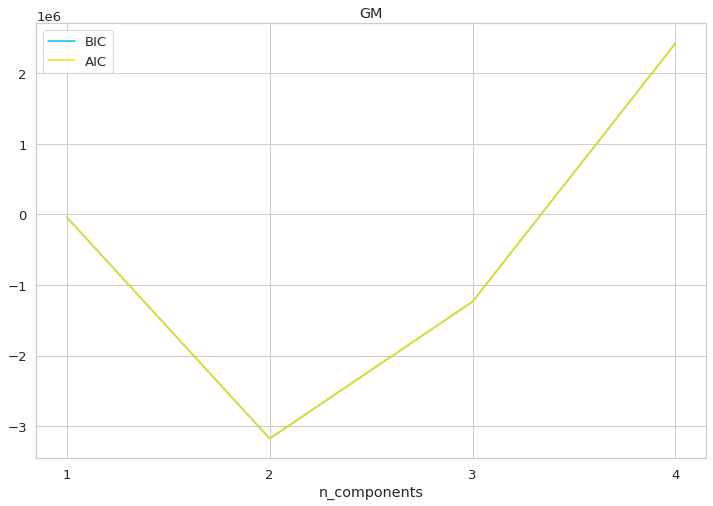

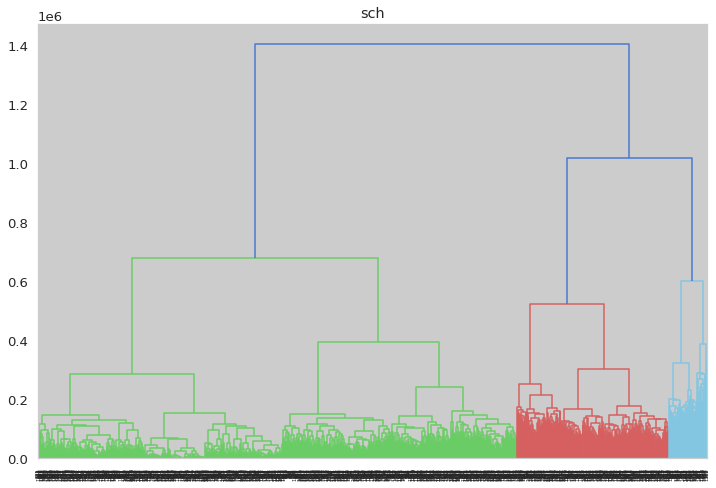

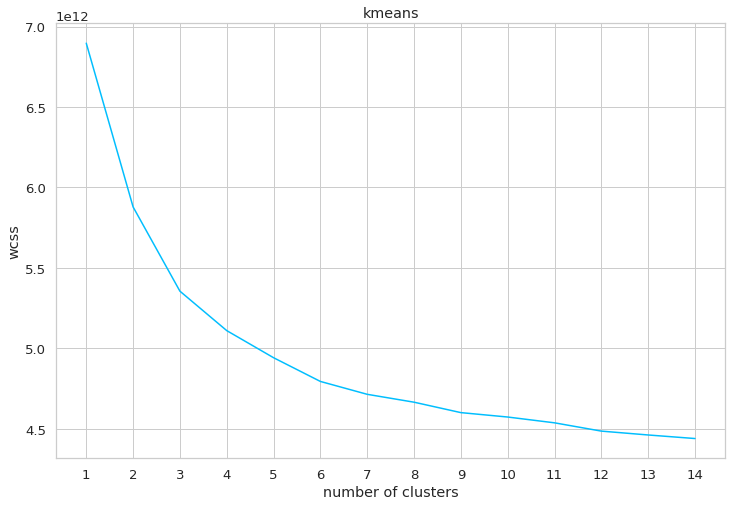

In [75]:
#clustering
import numpy as np
from sklearn.mixture import GaussianMixture as GM
import matplotlib.pyplot as plt

n_components=np.arange(1,5)
review_data=[]
for i in df_clustering.reviewToken:
  review_data.append(i)
review_data=np.array(review_data)
ems=[GM(n_components=n, covariance_type='full', random_state=0).fit(review_data) for n in n_components]
plt.figure()
plt.plot(n_components, [em.bic(review_data) for em in ems], label='BIC')
plt.plot(n_components, [em.bic(review_data) for em in ems], label='AIC')
plt.xticks(ticks=n_components)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('GM')

import scipy.cluster.hierarchy as sch
plt.figure()
dendrogram=sch.dendrogram(sch.linkage(review_data, method='ward'))
plt.title('sch')

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(review_data)
  wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,15), wcss)
plt.title('kmeans')
plt.xlabel('number of clusters')
plt.xticks(ticks=range(1,15))
plt.ylabel('wcss')

In [76]:
from sklearn.cluster import AgglomerativeClustering as Agg
from sklearn import metrics
kmeans=KMeans(n_clusters=6, random_state=1)
kmeans.fit(review_data)
kmeans_label=kmeans.predict(review_data)
df_clustering['kmeans_label']=kmeans_label

em=GM(n_components=2, covariance_type='full',random_state=1)
em.fit(review_data)
em_label=em.predict(review_data)
df_clustering['em_label']=em_label

hier=Agg(n_clusters=4, affinity='euclidean', linkage='ward')
hier.fit(review_data)
hier_label=hier.fit_predict(review_data)
df_clustering['hier_label']=hier_label


labels=['kmeans_label','em_label','hier_label']
score=dict()
def Silhouette(label_i):
  silhouette=metrics.silhouette_score(review_data, df_clustering[label_i], metric='euclidean')
  print(f'Silhouette of {label_i}: {silhouette}')
  score[label_i]=silhouette
  return score

for label in labels:
  Silhouette(label)

df_clustering.head()


Silhouette of kmeans_label: 0.10218862665055495
Silhouette of em_label: 0.4010105526357094
Silhouette of hier_label: 0.09793873272209479


,userid,review,clean_review,reviewToken,kmeans_label,em_label,hier_label
0,A0488385844WNV2OWO9X,Daughter took it from me. I only use JANE IREDALE. Now she does.,daughter took use jane iredale,"[101, 2684, 2165, 2224, 4869, 20868, 11960, 2571, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,1,3
1,A0916357J9P21ZUYUZO6,This product is alright but i don't think my skin like ita very much.This product is alright but...,product alright think skin like ita much product alright think skin like ita much,"[101, 4031, 10303, 2228, 3096, 2066, 2009, 2050, 2172, 4031, 10303, 2228, 3096, 2066, 2009, 2050...",1,1,3
2,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...,got sample stuff order derby extra blade normally use art shaving pre shave oil along aos shavin...,"[101, 2288, 7099, 4933, 2344, 7350, 4469, 6085, 5373, 2224, 2396, 21146, 6455, 3653, 27545, 3514...",0,1,2
3,A102866V814SOJ,"Excited to try it based on reviews, but find it to be a poor cleanser. Little baby acne since st...",excited try based review find poor cleanser little baby acne since starting using dry skin face ...,"[101, 7568, 3046, 2241, 3319, 2424, 3532, 4550, 8043, 2210, 3336, 9353, 2638, 2144, 3225, 2478, ...",4,0,0
4,A1047EDJ84IMAS,I wanted something to add a bit of sparkle to my hair and this is perfect! It's very subtle (un...,wanted something add bit sparkle hair perfect subtle unless get carried away also used top blush...,"[101, 2359, 2242, 5587, 2978, 26831, 2606, 3819, 11259, 4983, 2131, 3344, 2185, 2036, 2109, 2327...",1,1,3


In [77]:

with open('/content/drive/MyDrive/project5125/orignalData.csv', 'a') as f:
    df_clustering.to_csv(f, header=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'hier')

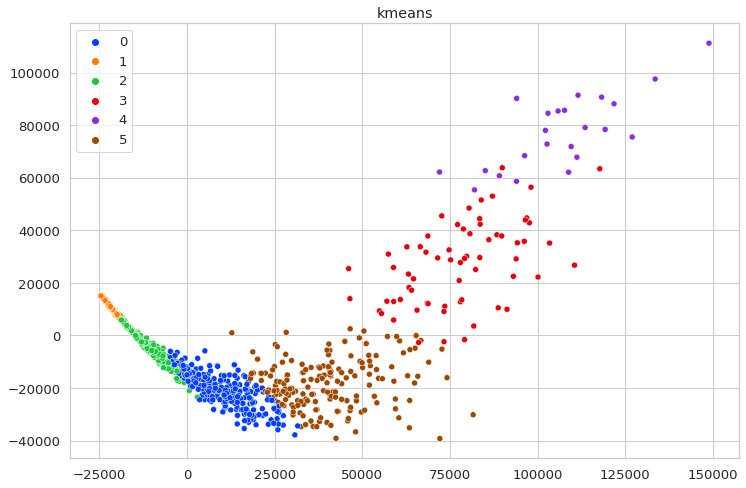

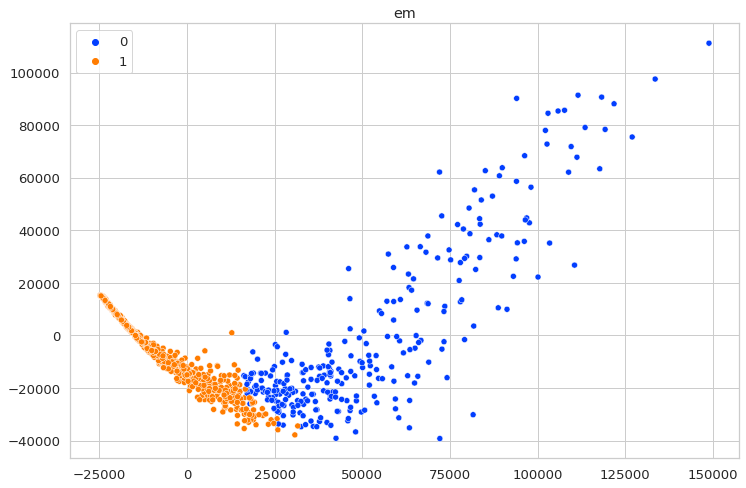

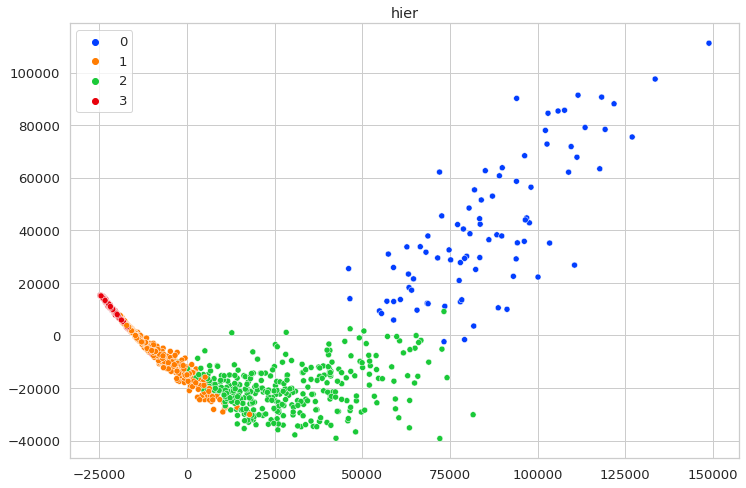

In [78]:
from sklearn.decomposition import PCA
import seaborn as sns
pca=PCA(n_components=2)
review_data_plt=pca.fit_transform(review_data)

plt.figure()
palette = sns.color_palette('bright', len(set(kmeans_label)))
sns.scatterplot(review_data_plt[:,0], review_data_plt[:,1], hue=kmeans_label, legend='full', palette=palette)
plt.title('kmeans')

plt.figure()
palette = sns.color_palette('bright', len(set(em_label)))
sns.scatterplot(review_data_plt[:,0], review_data_plt[:,1], hue=em_label, legend='full', palette=palette)
plt.title('em')

plt.figure()
palette = sns.color_palette('bright', len(set(hier_label)))
sns.scatterplot(review_data_plt[:,0], review_data_plt[:,1], hue=hier_label, legend='full', palette=palette)
plt.title('hier')


In [79]:
clustering ={'userID': list(df_clustering.userid),
             'clustering': list(df_clustering.em_label)}
df_=pd.DataFrame(clustering)
df_.head()
df_.shape

(1493, 2)

In [80]:
rating_dict = {'userID': list(df.reviewerID),
               'itemID': list(df.asin),
               'rating': list(df.overall)}
df2 = pd.DataFrame(rating_dict)
df2.shape


(5178, 3)

In [81]:
df3=df2.join(df_.set_index('userID'), on='userID')
df3.head()
df3.shape
#同一个clustering 的 dataframe( userID, itemID, rating) 当作 data 送进训练库


(5178, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'rating')

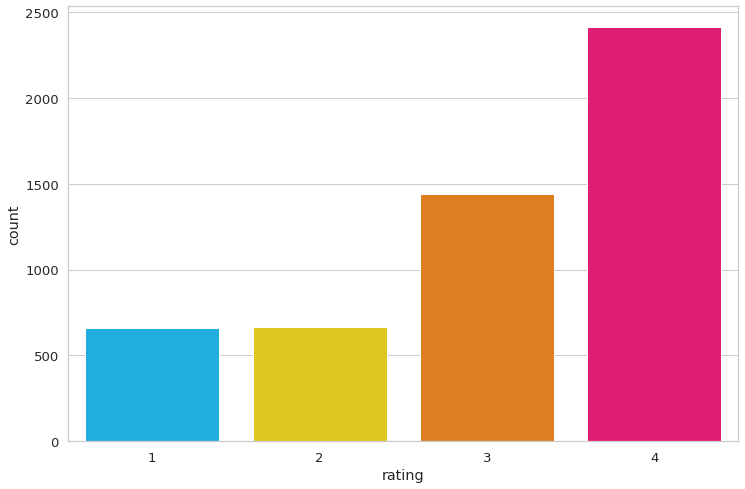

In [82]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors=['#01BEFE','#FFDD00', '#FF7D00', '#FF006D','#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(colors))
rcParams['figure.figsize']=12,8
sns.countplot(df2.rating)
plt.xlabel('rating')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


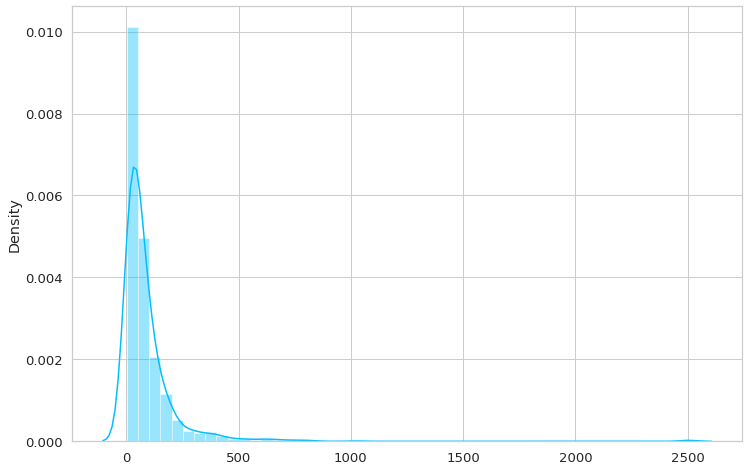

In [83]:
token_lens=[]
for txt in df_clustering.clean_review:
  tokens = tokenizer.encode(txt, max_length=2500,truncation=True)
  token_lens.append(len(tokens))
sns.distplot(token_lens)

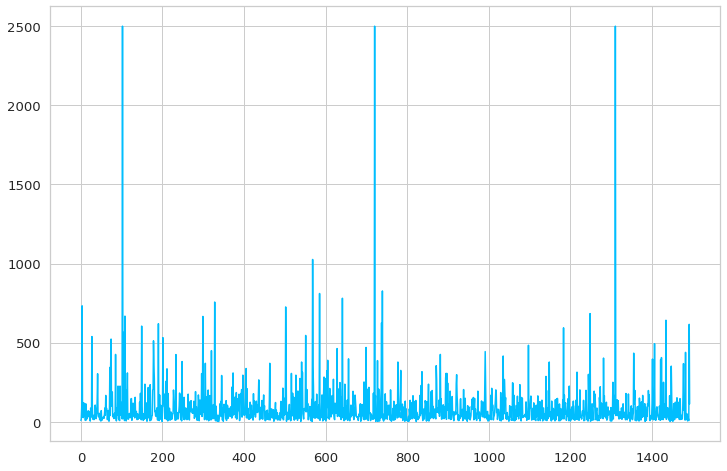

In [84]:
plt.figure()
plt.plot(range(len(token_lens)), token_lens)

In [85]:
from numpy import *
mean(token_lens)

89.58472873409244

In [92]:
benchmark = []
from surprise import SVD, NMF, NormalPredictor, KNNBasic
from surprise.model_selection import KFold, cross_validate
from surprise import Reader
from surprise import Dataset

#excluded5starRating, n_bestEM=2

data_ = Dataset.load_from_df(df3[df3['clustering']!=4].iloc[:,0:3], Reader())
data0 = Dataset.load_from_df(df3[df3['clustering']==0].iloc[:,0:3], Reader())
data1 = Dataset.load_from_df(df3[df3['clustering']==1].iloc[:,0:3], Reader())

i=0
algos={}
datasets_name=['nonclustering','clustering0','clustering1']
for data in [data_, data0, data1]:
  algo_best=None
  for algo in [SVD(), NMF(), NormalPredictor(), KNNBasic()]:
    result = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(result).mean(axis=0)
    name=str(algo).split(' ')[0].split('.')[-1]+'_'+datasets_name[i]
    tmp = tmp.append(pd.Series([name], index=['algo']))
    if algo_best==None:
      algo_best = tmp['test_rmse']
      algos[datasets_name[i]]=[round(tmp['test_rmse'],3), algo, name]
    elif tmp['test_rmse'] < algo_best:
      algos[datasets_name[i]]=[round(tmp['test_rmse'],3), algo,name]
    benchmark.append(tmp)
  i=i+1

print(algos)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'nonclustering': [0.797, <surprise.prediction_algorithms.knns.KNNBasic object at 0x7fa80eb87610>, 'KNNBasic_nonclustering'], 'clustering0': [0.738, <surprise.prediction_algorithms.knns.KNNBasic object at 0x7fa80ebaf710>, 'KNNBasic_clustering0'], 'clustering1': [0.863, <surprise.prediction_algorithms.knns.KNNBasic object at 0x7fa8366edf50>, 

In [93]:
surprise_results= pd.DataFrame(benchmark).set_index('algo')
surprise_results

,test_rmse,fit_time,test_time
algo,,,
SVD_nonclustering,0.853692,0.223060,0.015846
NMF_nonclustering,0.829297,0.391580,0.012115
NormalPredictor_nonclustering,1.466720,0.006606,0.013893
KNNBasic_nonclustering,0.797161,0.052163,0.119361
SVD_clustering0,0.774023,0.073398,0.004839
NMF_clustering0,0.715191,0.115477,0.004539
NormalPredictor_clustering0,1.373784,0.001921,0.004767
KNNBasic_clustering0,0.738146,0.005207,0.036478
SVD_clustering1,0.899583,0.141437,0.009522


In [108]:
with open('/content/drive/MyDrive/project5125/orignalData.csv', 'a') as f:
    surprise_results.to_csv(f, header=True)


In [95]:
surprise_results= pd.DataFrame(benchmark).set_index('algo').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
algo,,,
NMF_clustering0,0.715191,0.115477,0.004539
KNNBasic_clustering0,0.738146,0.005207,0.036478
SVD_clustering0,0.774023,0.073398,0.004839
KNNBasic_nonclustering,0.797161,0.052163,0.119361
NMF_nonclustering,0.829297,0.391580,0.012115
SVD_nonclustering,0.853692,0.223060,0.015846
NMF_clustering1,0.859660,0.264020,0.008356
KNNBasic_clustering1,0.862593,0.028188,0.052072
SVD_clustering1,0.899583,0.141437,0.009522


In [88]:
'''
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy
trainset, testset = train_test_split(data, test_size=0.25)
algo=SVD()
prediction=algo.fit(trainset).test(testset)
accuracy.rmse(prediction) 
'为什么要算这个？'
'''

"\nfrom surprise.model_selection import train_test_split, GridSearchCV\nfrom surprise import accuracy\ntrainset, testset = train_test_split(data, test_size=0.25)\nalgo=SVD()\nprediction=algo.fit(trainset).test(testset)\naccuracy.rmse(prediction) \n'为什么要算这个？'\n"

In [97]:
from collections import defaultdict

def get_n_predictions(predictions,n):
  topN = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
    topN[uid].append((iid, est))

  for uid, user_ratings in topN.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    topN[uid]=user_ratings[:n]
  
  return topN

In [98]:
from surprise import accuracy
n=5
values=list(algos.values())
datasets=[data_, data0, data1]
topN_clustering={}
for i in range(len(datasets)):
  data=datasets[i]
  algo_best=values[i][1]
  trainset = data.build_full_trainset() 
  algo_best.fit(trainset)
  testset = trainset.build_anti_testset()
  predictions = algo_best.test(testset)
  print(f'length of prediction:{len(predictions)}')
  #score=accuracy.rmse(predictions)
  #print(f'rmse for {values[i][2]} is: {score}')
  topN=get_n_predictions(predictions, n)
  print(f'len of topN is {len(topN)}')
  if i==0:
    topN0=topN
    #topN= sorted(topN.items(), key=lambda x:x[0]) 
    print(f'top{n} for non_clustering dataset is: {topN}')
    print(len(topN))
  else:
    topN_clustering.update(topN)
#topN_clustering= sorted(topN_clustering.items(), key=lambda x:x[0]) 
print(f'top{n} for clustering dataset is: {topN_clustering}')
print(len(topN_clustering))
    
  

Computing the msd similarity matrix...
Done computing similarity matrix.
length of prediction:1339658
len of topN is 1493
top5 for non_clustering dataset is: defaultdict(<class 'list'>, {'A2HOI48JK8838M': [('B0002MPS7G', 3.5), ('B00080DK86', 3.5), ('B00005V50B', 3.082271147161066), ('B000068DWY', 3.082271147161066), ('B000142FVW', 3.082271147161066)], 'A1Y39RECFXEGNL': [('B00005V50B', 3.082271147161066), ('B000068DWY', 3.082271147161066), ('B000142FVW', 3.082271147161066), ('B00014351Q', 3.082271147161066), ('B0001433OU', 3.082271147161066)], 'ACUGBCEADYT6D': [('B00005V50B', 3.082271147161066), ('B000068DWY', 3.082271147161066), ('B000142FVW', 3.082271147161066), ('B00014351Q', 3.082271147161066), ('B0001433OU', 3.082271147161066)], 'A1RRX286ZRI830': [('B00004U9V2', 3.082271147161066), ('B000068DWY', 3.082271147161066), ('B000142FVW', 3.082271147161066), ('B00014351Q', 3.082271147161066), ('B0001433OU', 3.082271147161066)], 'A2KJIX9GXBCVWH': [('B00004U9V2', 3.082271147161066), ('B00005

In [99]:
#[('A0488385844WNV2OWO9X', [('B00004U9V2', 5), ('B000068DWY', 5), ('B0001EL9BO', 5), ('B0001XDU2Q', 5), ('B0006FMQWO', 5)])..]
#[('A0488385844WNV2OWO9X', [('B00005V50B', 5), ('B0001EL9BO', 5), ('B0002H842C', 5), ('B0002ZW5UQ', 5), ('B0009DVDTU', 5)])..]
# total distinct userid: 2750
#!!!Recommendation from clustering would be better
userid='A0488385844WNV2OWO9X'
def get_recommendation_score(userid):
  return (topN0[userid], topN_clustering[userid])

def get_recommendation(userid):
  r1=[]
  r2=[]
  for i in range(len(topN0[userid])):
    r1.append(topN0[userid][i][0])
  for i in range(len(topN_clustering[userid])):
    r2.append(topN_clustering[userid][i][0])
  return (r1,r2)

recommendation_nonclustering, recommendation_clustering = get_recommendation(userid)
print(f'recommendation_nonclustering is:{recommendation_nonclustering}')
print(f'recommendation_clustering is: {recommendation_clustering}')

recommendation_nonclustering is:['B000GHVTN4', 'B007P0MO2U', 'B00AG1E5YK', 'B00F9JGPTW', 'B00004U9V2']
recommendation_clustering is: ['B000GHVTN4', 'B00AG1E5YK', 'B00F9JGPTW', 'B00004U9V2', 'B00005V50B']


In [100]:
#df_condition=df_clustering[df_clustering['em_label'==0]]
#series=df.groupby('reviewerID').apply(lambda x: '.'.join(x['reviewText']))
def wordlist(df_condition):
  word_list=[]
  for i in df_condition.clean_review:
    word_list.extend(i.split())
  return word_list


In [106]:
#df_condition=df_clustering[df_clustering['em_label'==0]]
wordlist_clustering0=wordlist(df_clustering[df_clustering['em_label']==0])
wordlist_clustering1=wordlist(df_clustering[df_clustering['em_label']==1])
wordlist_nonclustering=wordlist(df_clustering[df_clustering['em_label']>0])
print(wordlist_clustering0[1:10])

['try', 'based', 'review', 'find', 'poor', 'cleanser', 'little', 'baby', 'acne']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


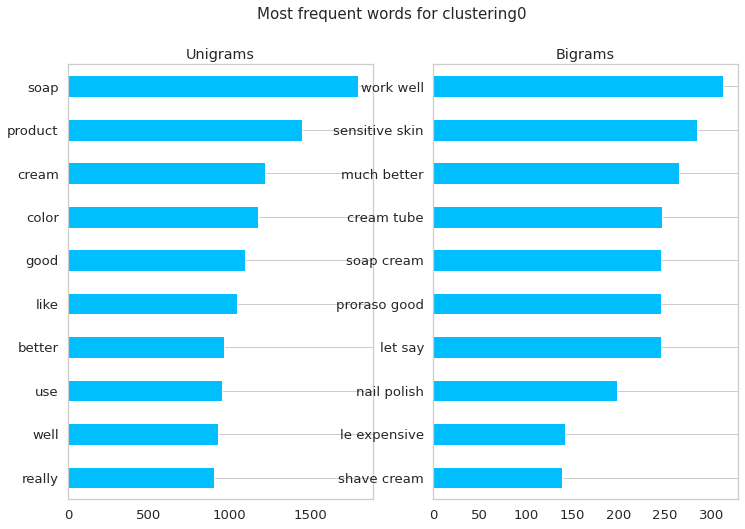

In [102]:
#word-frequency
top=10
nltk.download('punkt')
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words for clustering0", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(wordlist_clustering0)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(wordlist_clustering0, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


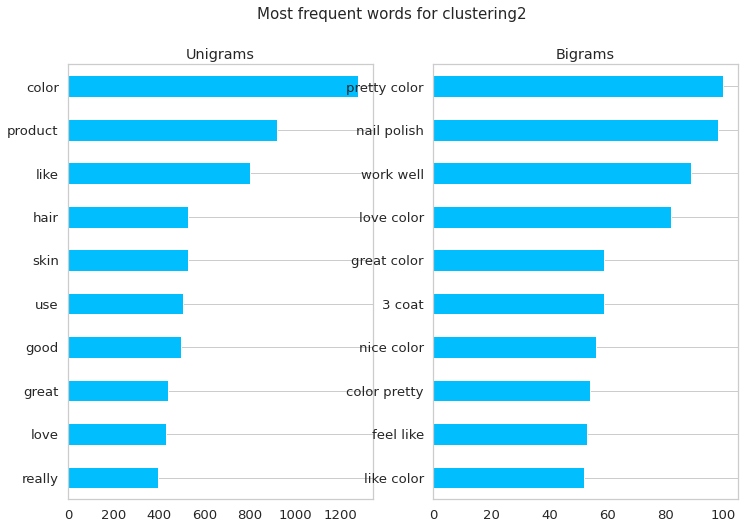

In [107]:
#word-frequency
top=10
nltk.download('punkt')
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words for clustering2", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(wordlist_clustering1)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(wordlist_clustering1, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


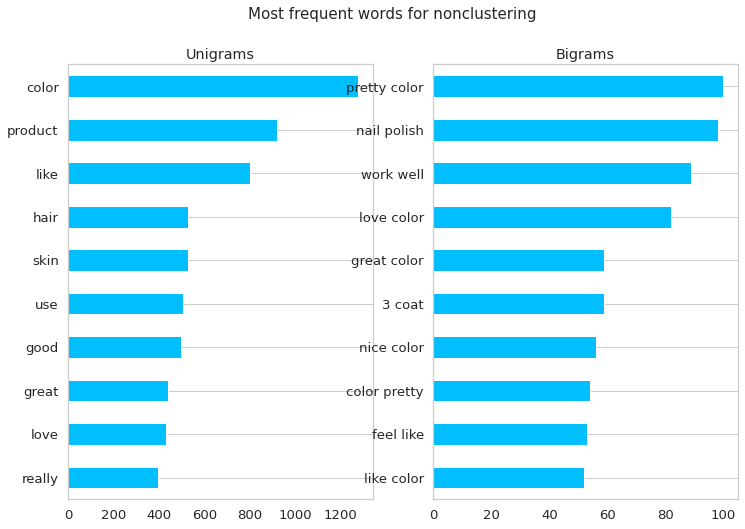

In [104]:
#word-frequency
top=10
nltk.download('punkt')
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words for nonclustering", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(wordlist_nonclustering)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(wordlist_nonclustering, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [ ]:
#scrapping for image&title
'''
recommendation_nonclustering is:['B000068DWY', 'B0001EL9BO', 'B00021AMZK', 'B00021CDQ6', 'B0007M11XQ']
recommendation_clustering is: ['B0001EL9BO', 'B0007M11XQ', 'B000IOATJU', 'B000PHTC20', 'B000YBIOB2']

" data-old-hires="https://images-na.ssl-images-amazon.com/images/I/61s4PEW2%2BCL._SL1000_.jpg" 
<img alt="OPI Nail Lacquer, Red Nail Polish, 0.5 fl oz" src="
data:image/webp;base64,UklGRrQVAABXRUJQVlA4IKgVAABweQCdASpWAVY
'''
!pip install beautifulsoup4

In [109]:
import bs4
import re
from bs4 import BeautifulSoup
import requests
#https://www.amazon.com/dp/[asin]

index=['B000068DWY', 'B0001EL9BO', 'B00021AMZK', 'B00021CDQ6', 'B0007M11XQ']
url = "https://www.amazon.com/dp/B000068DWY"
#kv={'user-agent': 'Mozilla/5.0'}
#response = requests.get(url, headers=kv)
response = requests.get(url)
response.encoding=response.apparent_encoding
#print(response.text)
response.status_code

503

In [ ]:
response.request.headers